In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing required Libraries

In [146]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

Loading the Data Set

In [147]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reviewing Data Set at initial stage, found mixed datatypes; Target variable data is classification data so it is a classification problem

In [148]:
df.shape

(891, 12)

There are 891 Rows and 12 Columns in Data Set

In [149]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, Sex, Ticket, Cabin and Embarked are categorical data columns; Age and Fare are Floating Data columns and rest are integer data type columns

In [150]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in Age, Cabin and Embarked Columns
Out of 891 rows, 687 are null values for Cabin So, its better to drop Cabin Column for Model
Age and Embarked Null Values need to be filled

In [151]:
df=df.drop(columns='Cabin',axis=1)

Dropping the Cabin Column

In [152]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analyzing the Statistical Data measurements like mean, std...,

In [154]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

Survived, Pclass, Sex, SibSp, Parch and Embarked has classification data and rest of the columns are continous

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [156]:
df['Survived'].unique()

array([0, 1], dtype=int64)

Checking the Target Variable Unique values and counts (below)

In [157]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 passengers survived (1) and 549 passengers didnt survive (0)

([<matplotlib.patches.Wedge at 0x1d79b0638b0>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

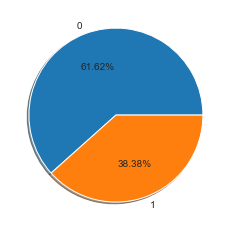

In [158]:
labels = '0','1'
fig, ax = plt.subplots()
ax.pie(df['Survived'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

38.38% is the survived percentage rate

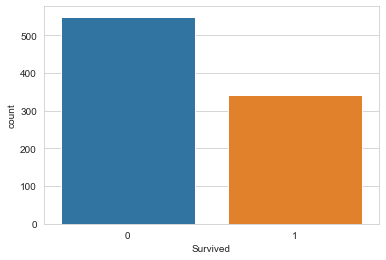

In [159]:
sns.countplot(df['Survived']);

In [160]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

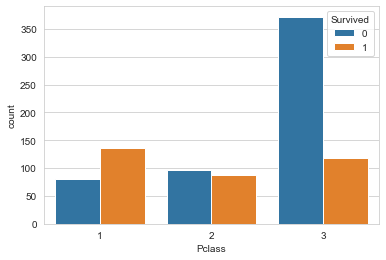

In [161]:
sns.set_style('whitegrid')
sns.countplot('Pclass',hue='Survived',data=df)

Analyzing the relationship between Pclass and survived data. Upon review, found Class 1 passengers has more survival percentage, followed by class 2 and at last class 3.

In [162]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

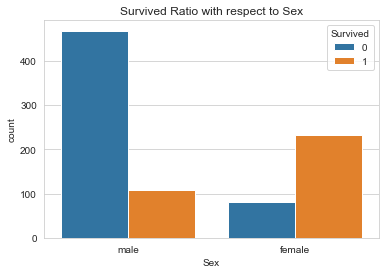

In [163]:
plt.figsize = (7,5)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Survived Ratio with respect to Sex')
sns.countplot('Sex',hue = 'Survived',data = df)
plt.show

Analyzing the relationship between Sex and survived data. Upon review, found females survived rate is higher than male

In [164]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

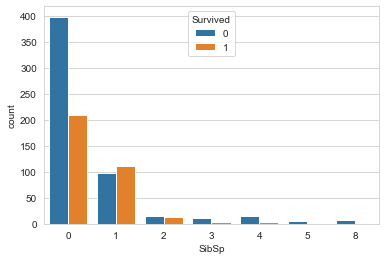

In [165]:
sns.set_style('whitegrid')
sns.countplot('SibSp',hue='Survived',data=df)

In [166]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

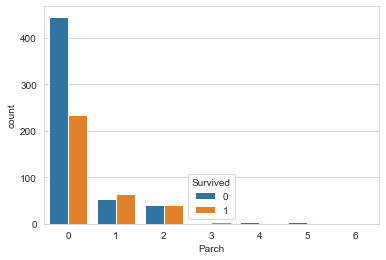

In [167]:
sns.set_style('whitegrid')
sns.countplot('Parch',hue='Survived',data=df)

Above 2 graphs represent Siblings and Parents survived comparision. Upon review, found most of Passengers travelled without parent and siblings didnt survive and ratio of survived vs didnt survive for singles are nearly 50%

In [168]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Common Value of Embarked is S

<AxesSubplot:xlabel='Embarked', ylabel='count'>

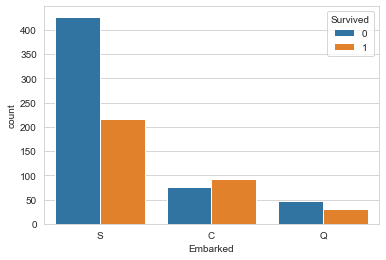

In [169]:
sns.set_style('whitegrid')
sns.countplot('Embarked',hue='Survived',data=df)

Passengers from Port C has survival rate compared to S and Q; 
Majority of the passengers ported from Port S, followed by C and Q

In [170]:
common_value = 'S'
df['Embarked'] = df['Embarked'].fillna(common_value)

Considering Common value as 'S' due to majority count and filling the null values in embarked column with common value 'S'

In [171]:
df['Embarked'].isnull().sum()

0

Crosschecking the null values in Embarked column after filling

In [172]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

Using mean to fill the null values in Age column since it is continous data column

In [173]:
df['Age'].isnull().sum()

0

Crosschecking the null values in Age column after filling

In [174]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Crosschecking the null values in all columns and found no null values

In [175]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [176]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Obtaining the details of columns 'Sex' and 'Embarked' for encoding

In [177]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':2,'C':0,'Q':1}},inplace = True)

In [178]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


Converting the categorical data alphabetically

In [179]:
df_new=df.drop(columns=['Name', 'Ticket'])
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


Dropping the Name and Ticket column since it doesnt have an impact on the survived data and also it is represented indirectly under passenger ID, Fare

In [180]:
df=df_new

In [181]:
corr_mat=df.corr()

In [182]:
corr_mat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


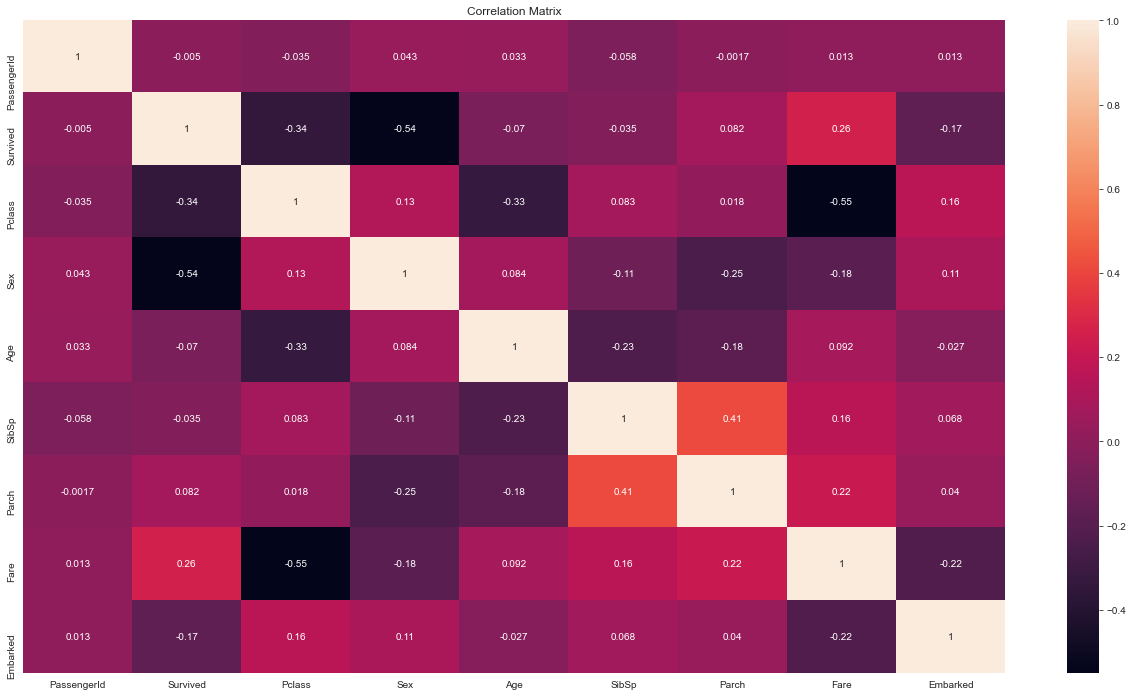

In [183]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

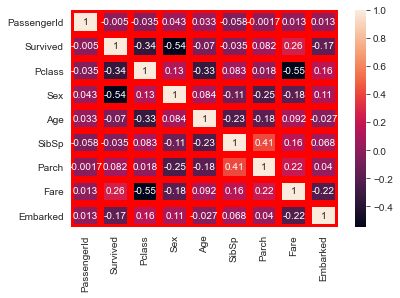

In [184]:
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='r')

In [185]:
corr_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

Checking the Correlation between the target value and rest columns using Heatmap, Correlation Matrix.

Upon review, found Sex, Pclass, Fare are highly correlated with Survived data

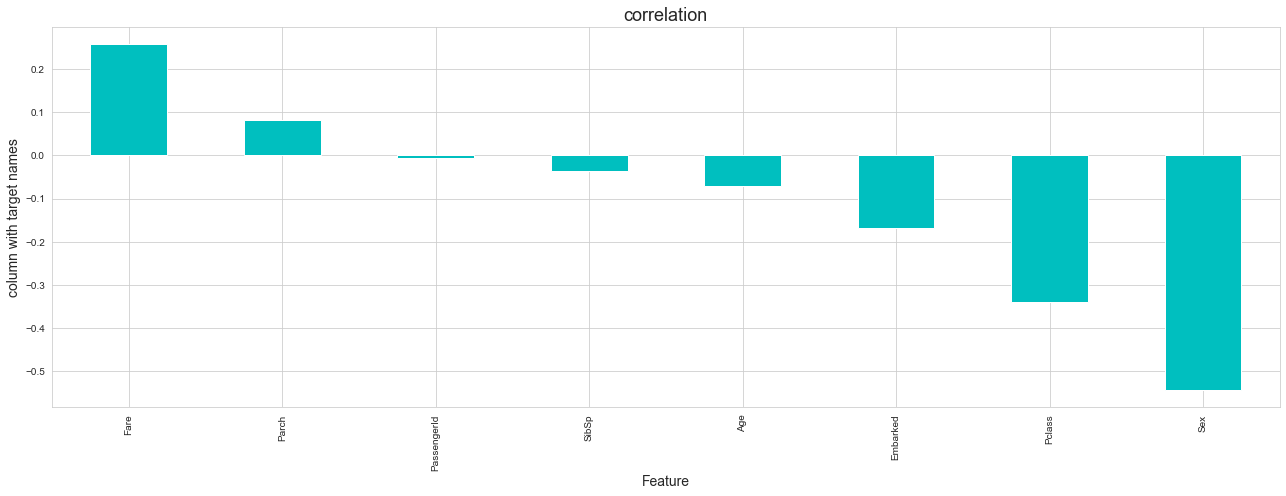

In [186]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Finding the relationship type of highly correlated columns with respect to target variable below

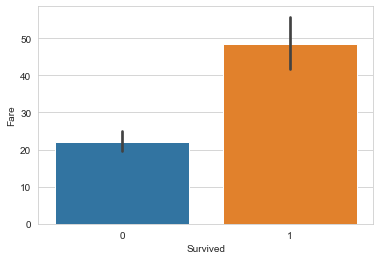

In [187]:
sns.barplot(df['Survived'], df['Fare']);

Checking the relationship between Fare and survived; upon review, found higher Fare Passenger has more survive rate

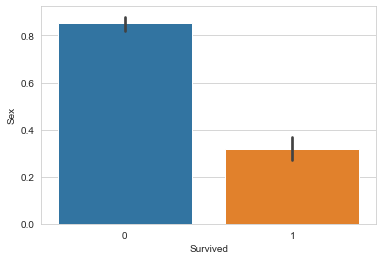

In [188]:
sns.barplot(df['Survived'], df['Sex']);

Checking the relationship between Sex and survived; upon review, found Female Passenger has more survive rate

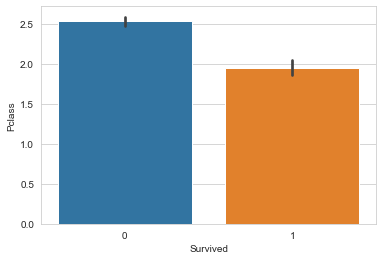

In [189]:
sns.barplot(df['Survived'], df['Pclass']);

Checking the relationship between Fare and survived; upon review, found High Class Passenger has more survive rate

In [190]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

Separating Features and Target Variable

In [191]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

Checking for the Skewness and found Fare, SibSp, Parch, Embarked, Pclass and Sex columns has skewness

In [192]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

Removing Skewness through Power Transforms

In [193]:
df_skew.skew()

PassengerId   -0.283201
Pclass        -0.441438
Sex           -0.618921
Age            0.064420
SibSp          0.808608
Parch          1.228795
Fare          -0.040329
Embarked      -1.064527
dtype: float64

Checking Skewness after power transforms

In [194]:
df=df_skew

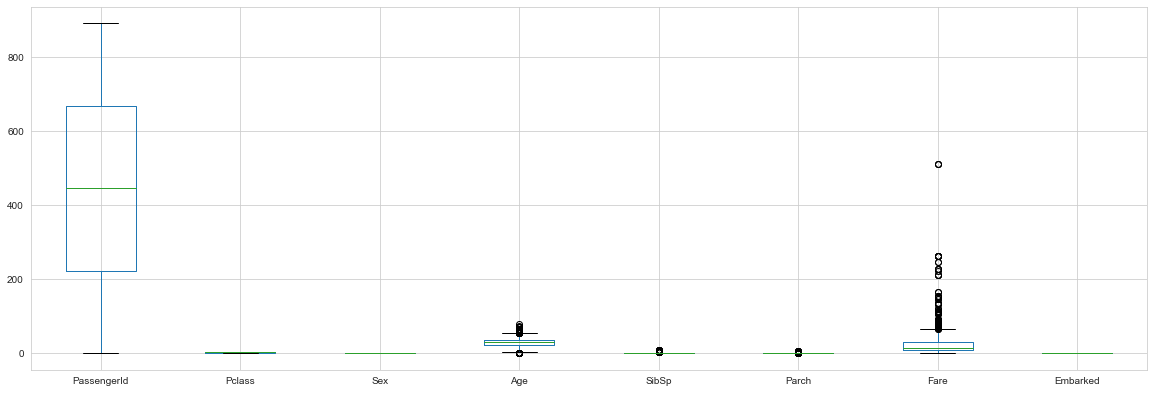

In [195]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Checking for Outliers through box plot graphs and found Age, SibSp, Parch and Fare has outliers; Checking individually in separate box plots below

<AxesSubplot:>

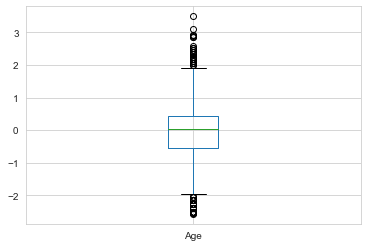

In [196]:
df['Age'].plot.box()

<AxesSubplot:>

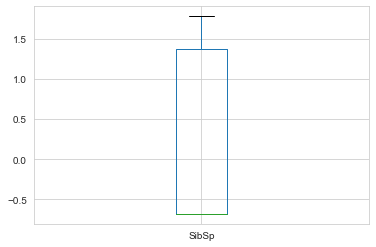

In [197]:
df['SibSp'].plot.box()

<AxesSubplot:>

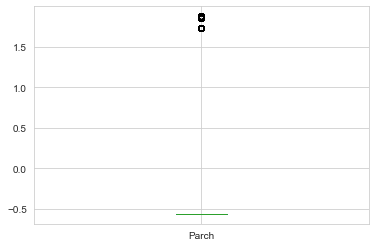

In [198]:
df['Parch'].plot.box()

<AxesSubplot:>

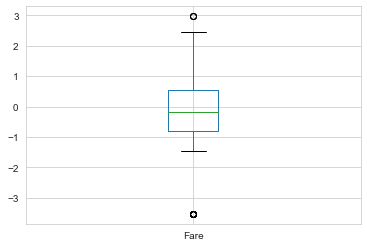

In [199]:
df['Fare'].plot.box()

In [200]:
from scipy.stats import zscore
z=np.abs(zscore(df_skew))
df_outlier=df_skew[(z<3).all(axis=1)]

Using zscore, removing the outliers

In [201]:
df_outlier.shape

(874, 8)

In [202]:
df.shape

(891, 8)

In [203]:
Data_loss=((891-874)/891)*100
Data_loss

1.9079685746352413

After Outliers removal, found data loss of 1.90% which is within acceptable range

In [204]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58595414],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67817453]])

Scaling the Feature data

In [205]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [206]:
y_over.value_counts()

1    549
0    549
Name: Survived, dtype: int64

Correcting the Class imbalance using SMOTE (Oversampling)

In [207]:
x=x_over
y=y_over

In [208]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8454545454545455  on Random_State  117


Finding the Random State value for best accuracy for model building

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=117)

Logistic Regression Model Build:

In [210]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8454545454545455
[[95 17]
 [17 91]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       112
           1       0.84      0.84      0.84       108

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



In [211]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.7604856787048568


Logistic Regression Model Accuracy Difference is 84.54 - 76.04 = 8.5

Random Forest Model Build:

In [212]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predrf = RF.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))


0.8545454545454545
[[99 13]
 [19 89]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.87      0.82      0.85       108

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



In [213]:
scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.5611415525114155


Random Forest Model Accuracy Difference is 85.45 - 57.30 = 28.15

Decision Tree Classifier Model Build:

In [214]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8363636363636363
[[95 17]
 [19 89]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       112
           1       0.84      0.82      0.83       108

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



In [215]:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.4463138231631382


Decision Tree Model Accuracy Difference is 83.63 - 44.63 = 39

SVC Model Build:

In [216]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.8545454545454545
[[100  12]
 [ 20  88]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.88      0.81      0.85       108

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



In [217]:
scr = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.8160564549605646


SVC Model Accuracy Difference is 85.45 - 81.60 = 3.85

SVC Model has the least difference in accuracy so it is the best model

In [218]:
parameters1 = {'C': [4, 5, 6, 7, 8, 10],
             'degree': [200, 700, 900],
             'max_iter': [200, 900],
             'gamma': ['scale','auto']}

In [219]:
GCV=GridSearchCV(SVC(),parameters1,cv=5)

In [220]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [4, 5, 6, 7, 8, 10], 'degree': [200, 700, 900],
                         'gamma': ['scale', 'auto'], 'max_iter': [200, 900]})

In [221]:
GCV.best_params_

{'C': 4, 'degree': 200, 'gamma': 'scale', 'max_iter': 900}

Obtaining the Best Parameters for Hyper parameters tuning

In [222]:
mod1=SVC(C=4, degree=200,gamma='scale',max_iter=900)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.0909090909091


SVC Model Accuracy after Hyper parameter Tuning is 84.09%

In [223]:
import joblib
joblib.dump(mod1,"Titanic_SVC.pkl")

['Titanic_SVC.pkl']

Saving the Model